In [14]:
import pandas as pd
import folium as fl
import webbrowser
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../database/meds_train_alunos.csv')
df.columns

Index(['ponto_id', 'rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2',
       'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3', 'delay_1', 'delay_2',
       'delay_3', 'lat', 'lon', 'indoor'],
      dtype='object')

In [16]:
# Remova os pontos e converta as strings para float
df['lat'] = df['lat'].str.replace('.', '').astype(float) / 1e6
df['lon'] = df['lon'].str.replace('.', '').astype(float) / 1e6

In [17]:
mapa_base = fl.Map(location=[df.iloc[0]['lat'], df.iloc[0]['lon']], zoom_start=13)

# Itere sobre o dataframe e adicione cada ponto ao mapa
for _, row in df.iterrows():
    fl.Marker(
        location=[row['lat'], row['lon']],
        popup=str(row['ponto_id'])  # isso irá exibir o ponto_id quando você clicar no marcador
    ).add_to(mapa_base)


In [18]:
# Visualize o mapa
mapa_base.save("mapa.html")

In [19]:
webbrowser.open("mapa.html", new=2)

True

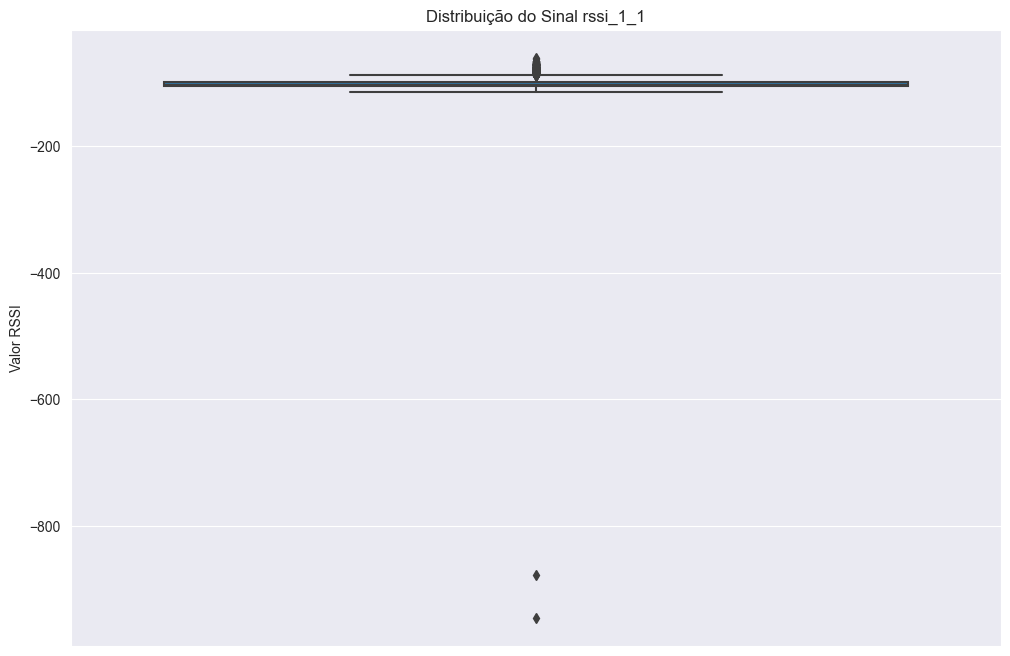

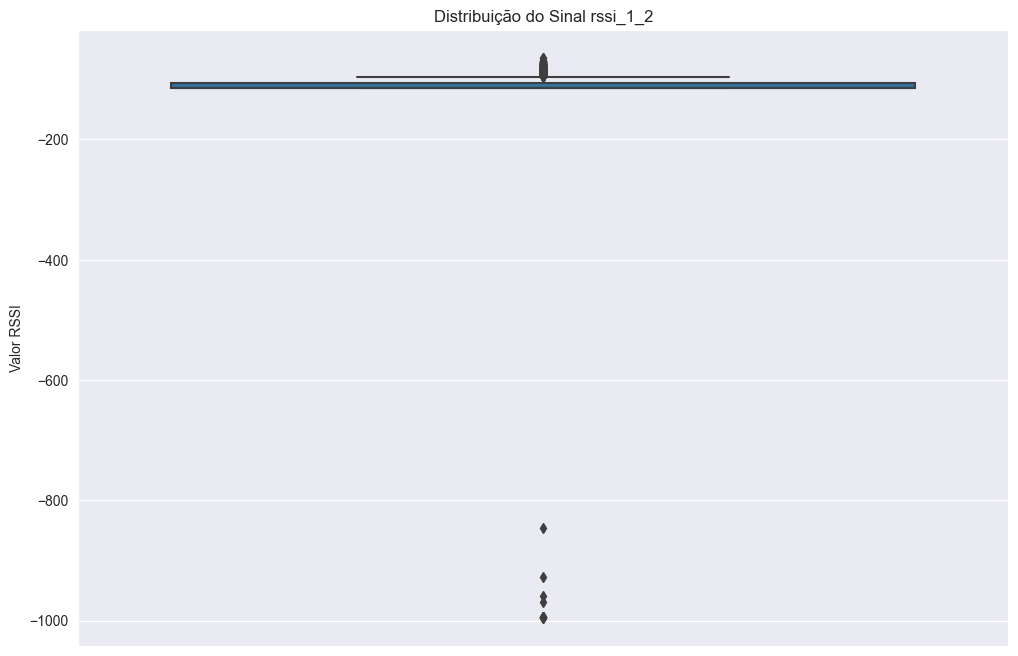

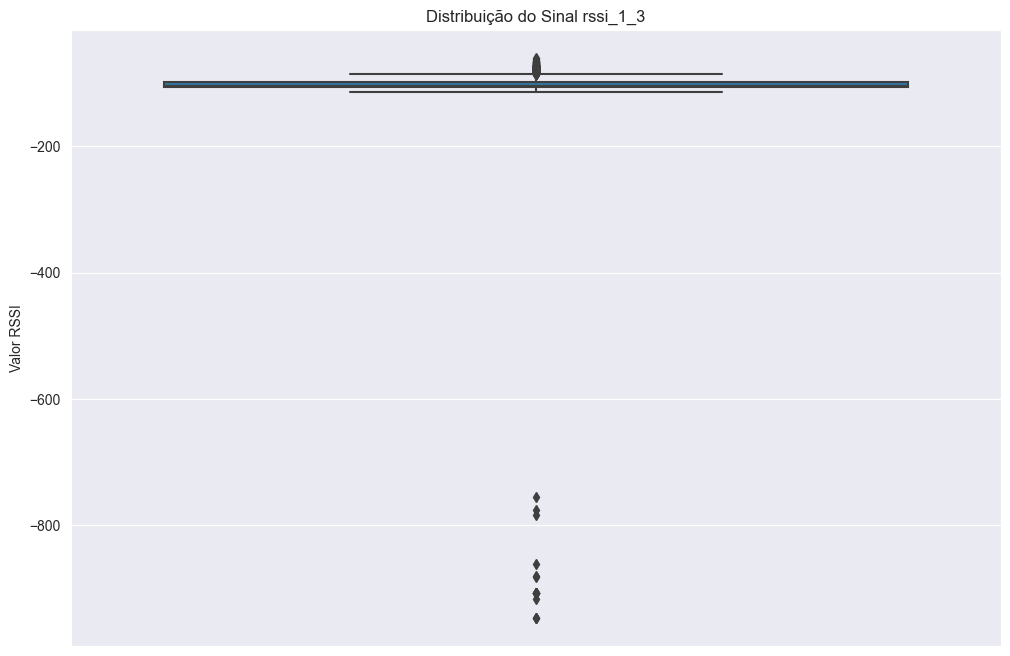

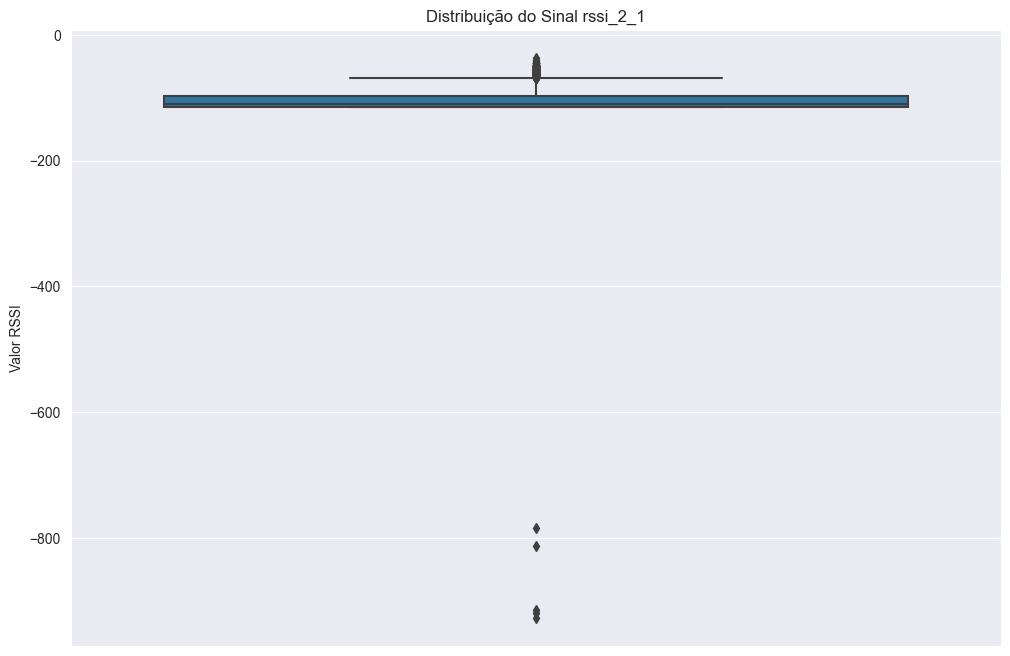

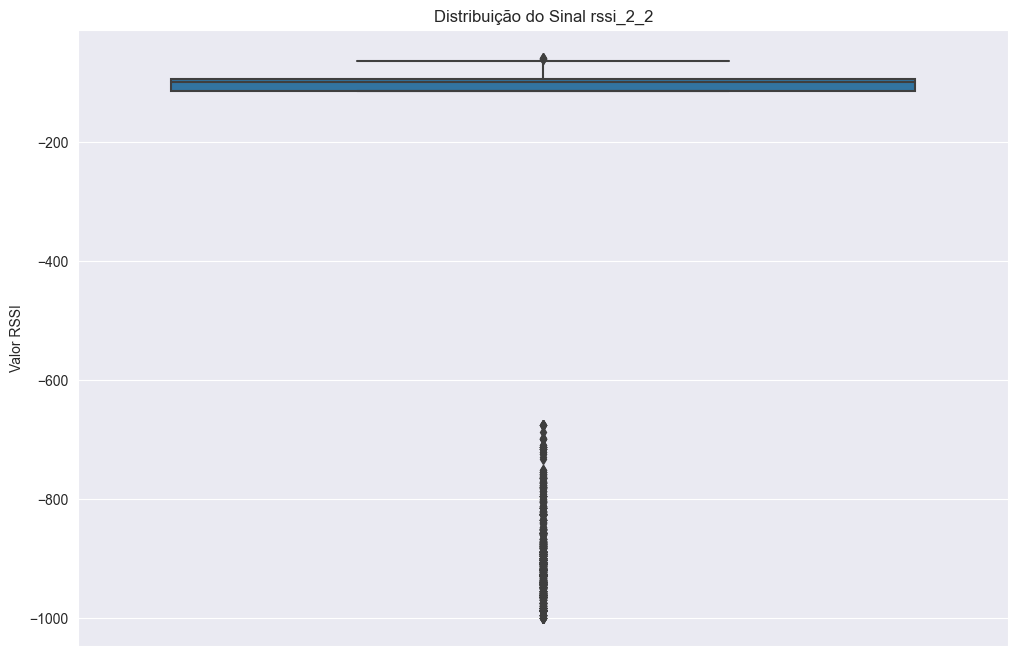

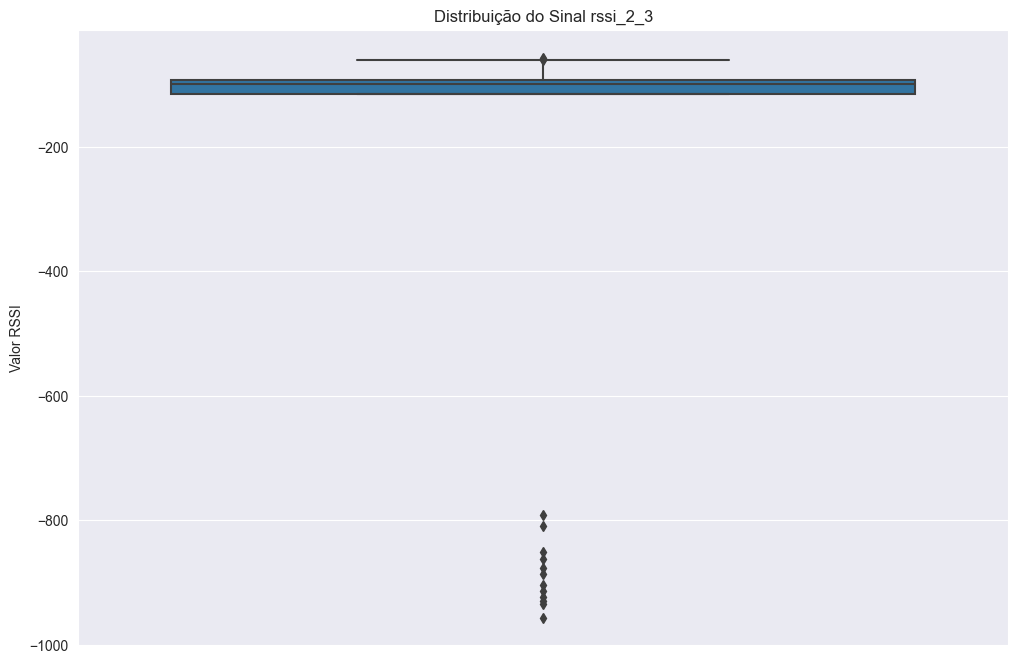

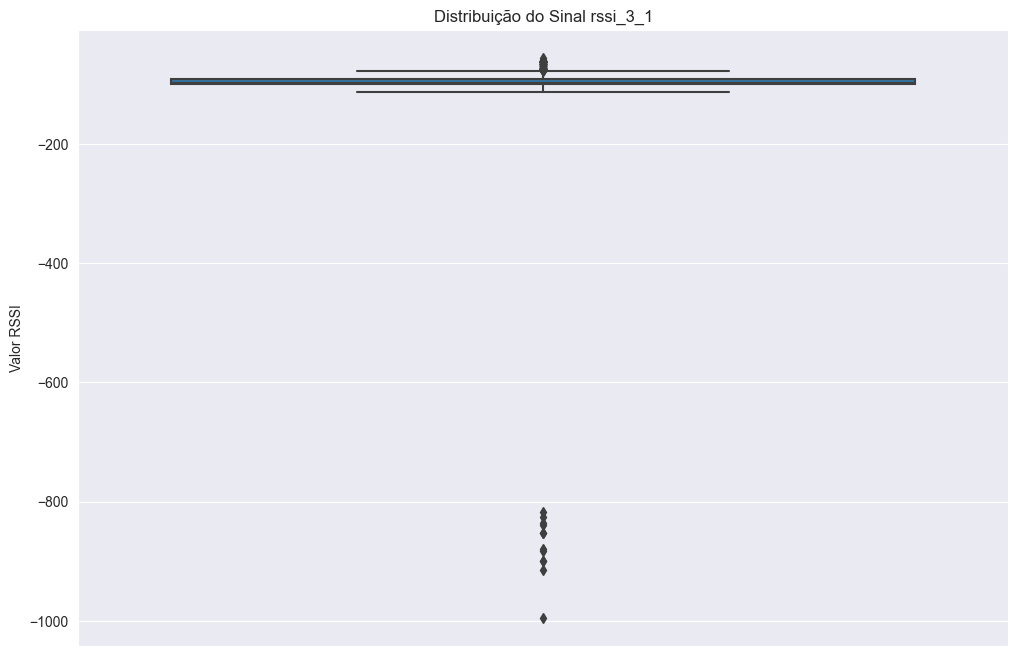

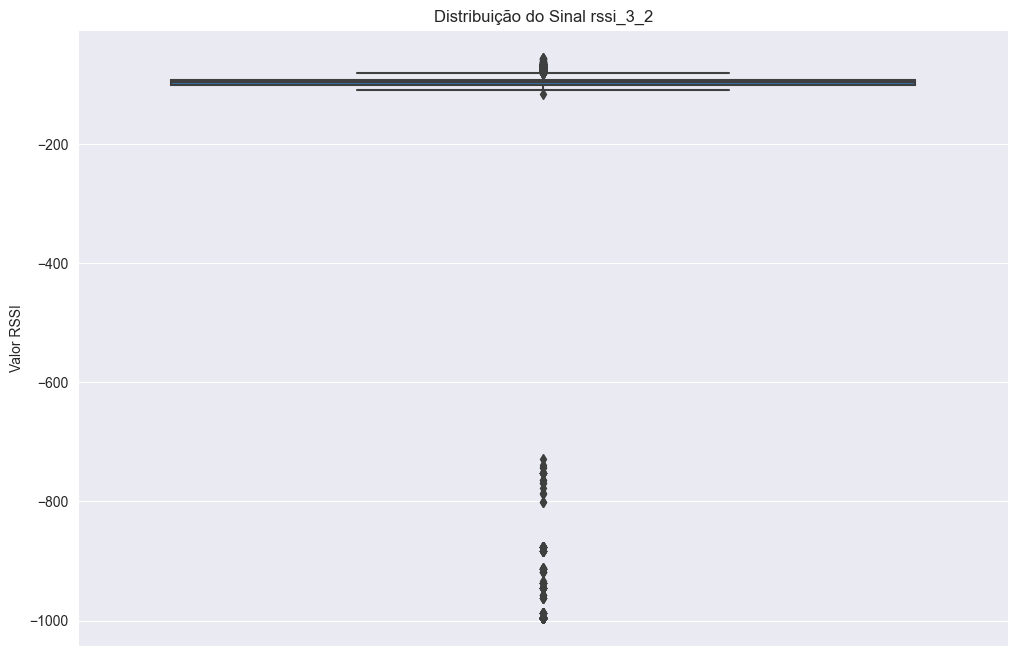

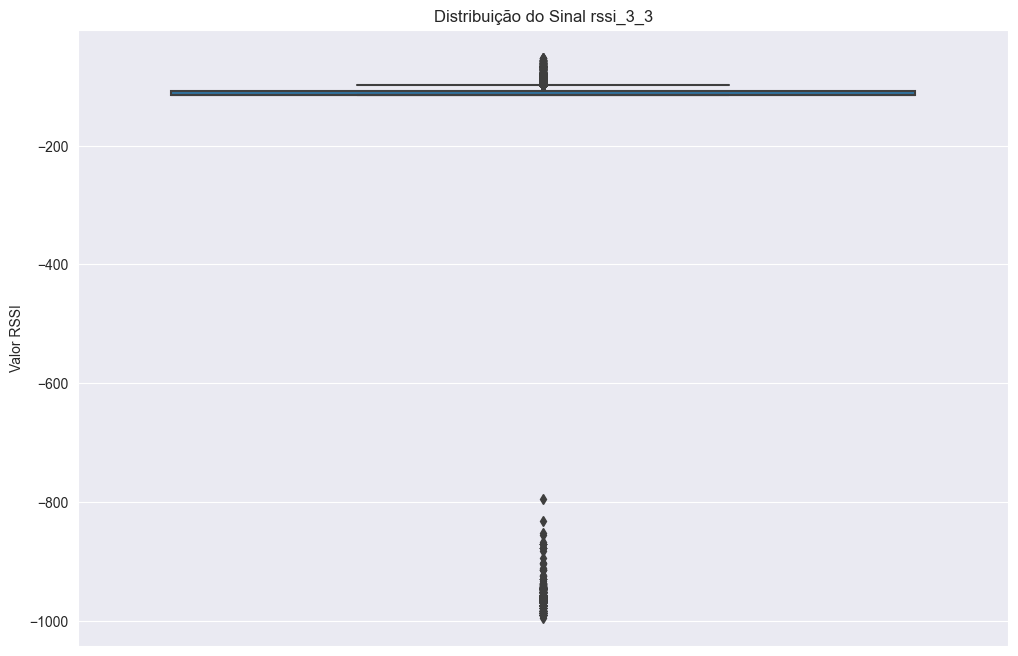

In [23]:
# Lista das colunas de sinais
sinal_cols = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2',
    'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'
]
# Converter cada coluna em sinal_cols para numérico
for col in sinal_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Criar boxplots
for col in sinal_cols:
    try:
        plt.figure(figsize=(12, 8))
        sns.boxplot(y=df[col])
        plt.title(f'Distribuição do Sinal {col}')
        plt.ylabel('Valor RSSI')
        plt.show()
    except Exception as e:
        print(f"Erro ao plotar a coluna {col}: {e}")


In [26]:
nan_counts = df[sinal_cols].isnull().count()
print(nan_counts)
for col in sinal_cols:
    if col not in df.columns:
        print(f"Coluna {col} não encontrada!")

rssi_1_1    6775
rssi_1_2    6775
rssi_1_3    6775
rssi_2_1    6775
rssi_2_2    6775
rssi_2_3    6775
rssi_3_1    6775
rssi_3_2    6775
rssi_3_3    6775
dtype: int64


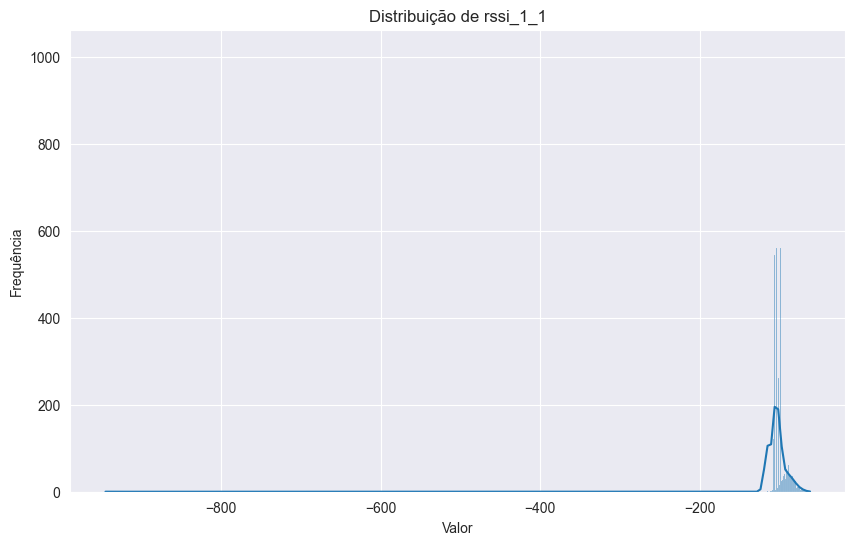

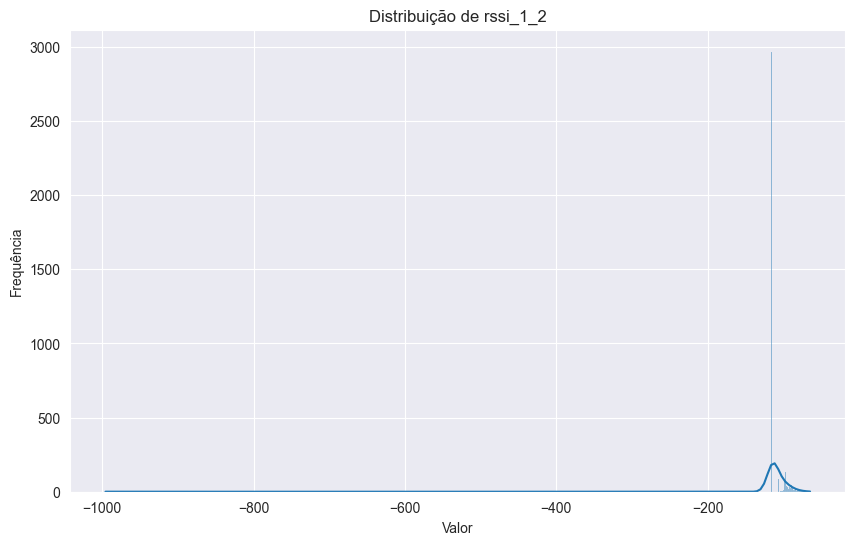

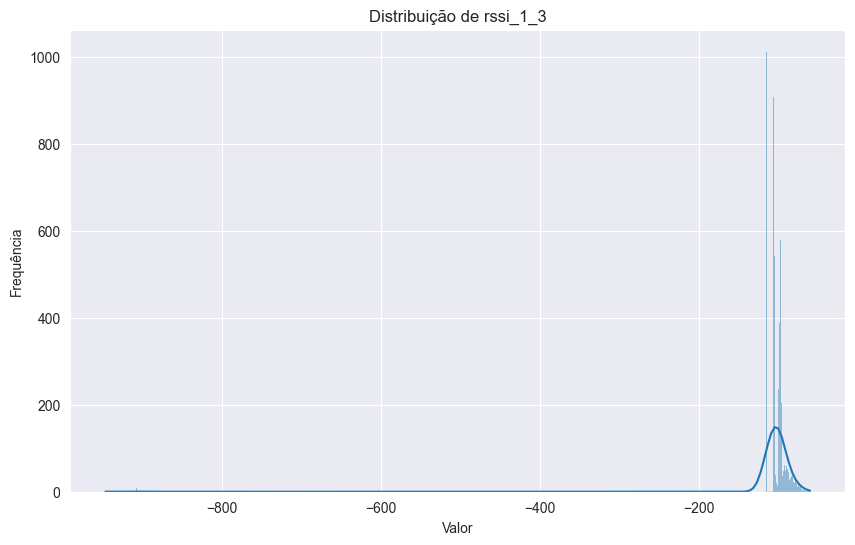

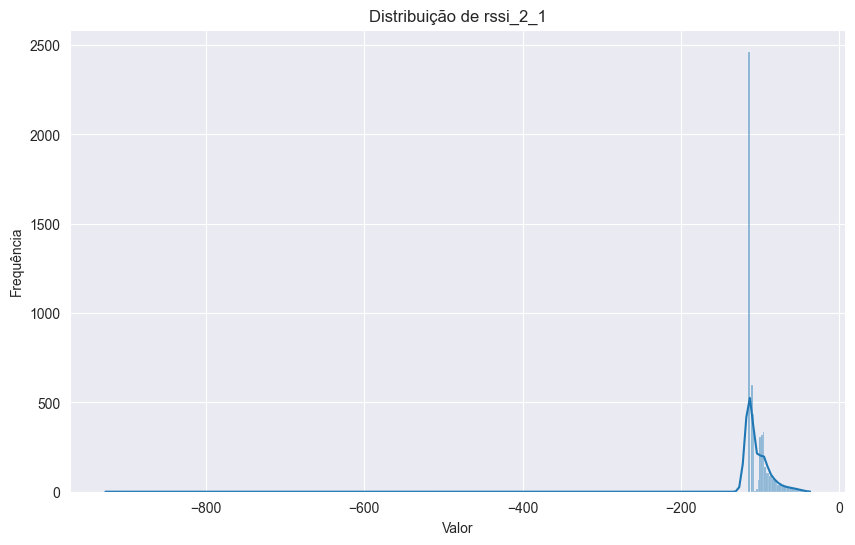

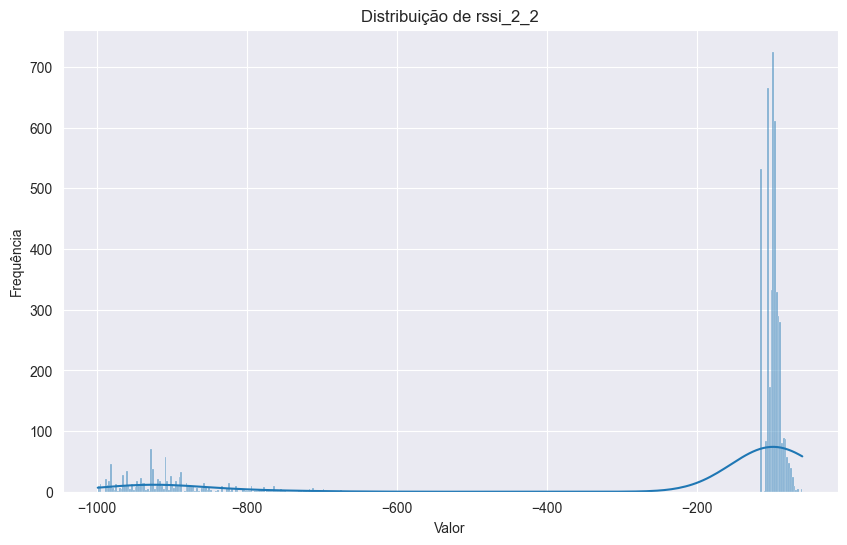

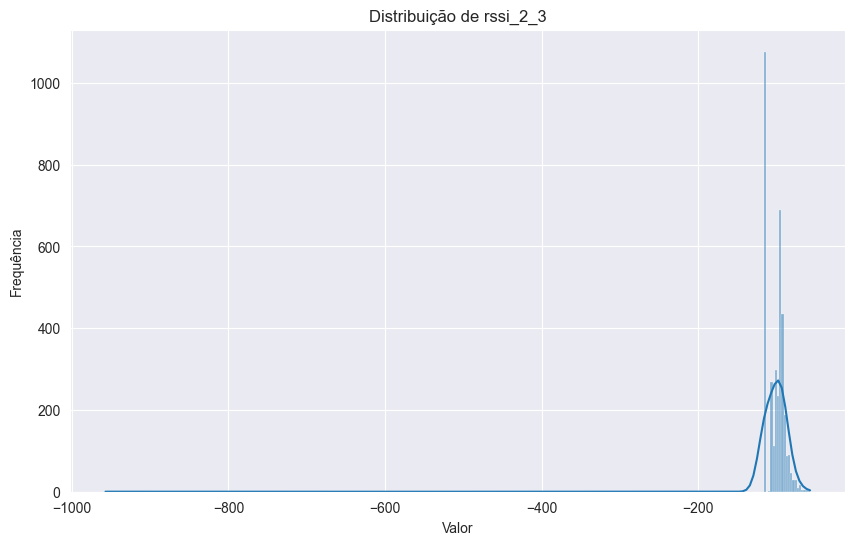

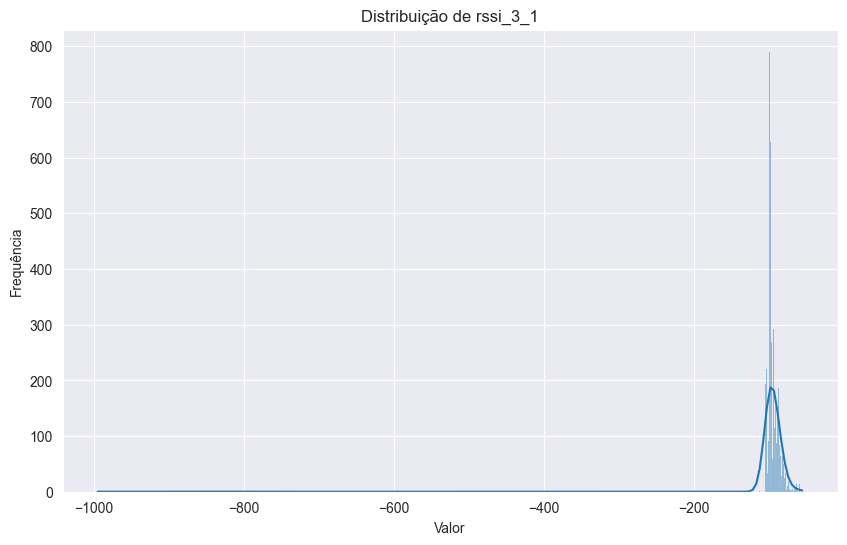

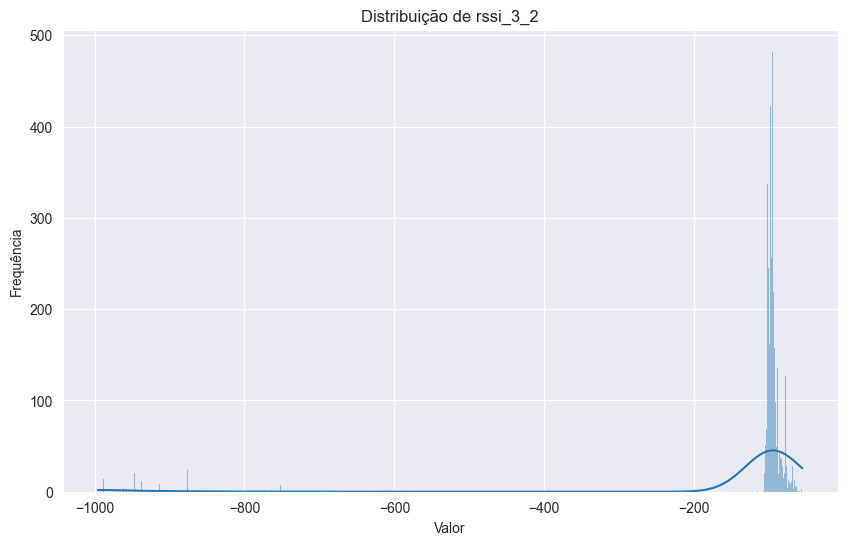

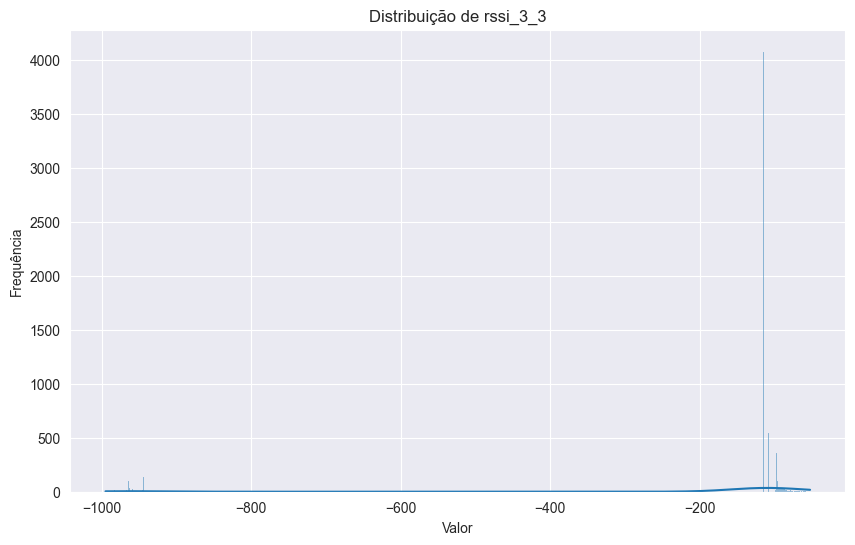

In [27]:
for col in sinal_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()